In [37]:
## MULTILABEL CLASSIFICATION  USING VGG16

In [38]:
## importing required packages

In [39]:
import numpy as np
import matplotlib.pyplot as plt

(2000, 2000, 3)
(256, 256, 3)


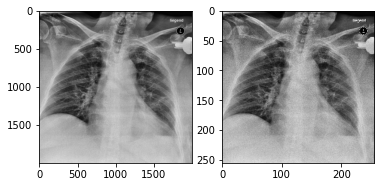

In [40]:
from matplotlib import image
import cv2

image_1=cv2.imread('/content/drive/MyDrive/multilabel dataset/test/COVID19/15.jpg')

## original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)
## resizing the image
image_resize=cv2.resize(image_1,((256,256)))

print(image_resize.shape)

plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [41]:
## Finding path for train data and test data

In [42]:
train_data_path='/content/drive/MyDrive/multilabel dataset/train'
test_data_path='/content/drive/MyDrive/multilabel dataset/test'

In [43]:
## Making images into linear format using tensorflow ImageDataGenerator module

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
preprocess_train=ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.4,
                                    vertical_flip=True,
                                    horizontal_flip=True)

preprocess_test=ImageDataGenerator(rescale=1./255)

In [46]:
## colloecting each image from train and test folder:

In [47]:
labels=['COVID19','NORMAL','PNEUMONIA']

In [48]:
train_data=preprocess_train.flow_from_directory(train_data_path,target_size=[256,256],class_mode='categorical',classes=labels,batch_size=32)

Found 5159 images belonging to 3 classes.


In [49]:
test_data=preprocess_test.flow_from_directory(test_data_path,target_size=[256,256],classes=labels,class_mode='categorical',batch_size=32)

Found 1288 images belonging to 3 classes.


In [50]:
## Now developing a model with vgg16 architecture

In [51]:
from tensorflow.keras.applications.vgg16 import VGG16

In [52]:
image_size=[256,256]

In [53]:
sol=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [54]:
## in vgg16 weights should not be updated to overcome that:

for i in sol.layers:
  i.trainable=False

In [55]:
from tensorflow.keras.layers import Flatten

In [56]:
## developing a flatten layer:
y=Flatten()(sol.output)

In [57]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax

In [64]:
from keras.api._v2.keras import activations
final=Dense(3,activation='softmax')(y)

In [65]:
from tensorflow.keras.models import Model

In [66]:
vgg16_model=Model(sol.inputs,final)

In [67]:
vgg16_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [68]:
vgg16_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])

In [69]:
vgg16_model.fit(train_data, epochs=20)

Epoch 1/20
162/162 [==============================] - 2563s 16s/step - loss: 0.4211 - Accuracy: 0.8583
Epoch 2/20
162/162 [==============================] - 198s 1s/step - loss: 0.2373 - Accuracy: 0.9101
Epoch 3/20
162/162 [==============================] - 195s 1s/step - loss: 0.2097 - Accuracy: 0.9236
Epoch 4/20
162/162 [==============================] - 198s 1s/step - loss: 0.2007 - Accuracy: 0.9256
Epoch 5/20
162/162 [==============================] - 195s 1s/step - loss: 0.2373 - Accuracy: 0.9207
Epoch 6/20
162/162 [==============================] - 195s 1s/step - loss: 0.2184 - Accuracy: 0.9238
Epoch 7/20
162/162 [==============================] - 196s 1s/step - loss: 0.1943 - Accuracy: 0.9349
Epoch 8/20
162/162 [==============================] - 195s 1s/step - loss: 0.1803 - Accuracy: 0.9380
Epoch 9/20
162/162 [==============================] - 196s 1s/step - loss: 0.1860 - Accuracy: 0.9378
Epoch 10/20
162/162 [==============================] - 196s 1s/step - loss: 0.1903 - Accu

In [70]:
## checking with test data

In [71]:
test_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [73]:
y_test_pred=vgg16_model.predict(test_data)

41/41 [==============================] - 933s 23s/step


In [80]:
y_test_pred

array([[7.3508488e-10, 1.3566310e-02, 9.8643363e-01],
       [1.0865336e-08, 1.0658538e-04, 9.9989343e-01],
       [6.4157590e-10, 7.6654855e-05, 9.9992335e-01],
       ...,
       [9.9396670e-01, 1.3371508e-04, 5.8995751e-03],
       [9.5447969e-01, 6.6855559e-05, 4.5453396e-02],
       [1.5357333e-10, 5.9661090e-01, 4.0338907e-01]], dtype=float32)

In [84]:
predicted_points = np.argmax(y_test_pred , axis = 1)

In [85]:
predicted_points

array([2, 2, 2, ..., 0, 0, 1])

In [86]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [87]:
accuracy_score(test_data.classes,predicted_points)

0.49767080745341613

In [88]:
confusion_matrix(test_data.classes , predicted_points)

array([[ 12,  27,  77],
       [ 20, 107, 190],
       [ 61, 272, 522]])

In [89]:
print(classification_report(test_data.classes , predicted_points))

              precision    recall  f1-score   support

           0       0.13      0.10      0.11       116
           1       0.26      0.34      0.30       317
           2       0.66      0.61      0.64       855

    accuracy                           0.50      1288
   macro avg       0.35      0.35      0.35      1288
weighted avg       0.52      0.50      0.50      1288



In [90]:
## Testing an image

In [101]:
import cv2

In [102]:
labels

['COVID19', 'NORMAL', 'PNEUMONIA']

In [114]:
# creating a function

def prediction(path):
  ## load the image
  image=plt.imread(path)
  print(image.shape)

  image=cv2.resize(image,(256,256))
  print(image.shape)

  image=np.array(image)/255.0

  image=np.expand_dims(image,axis=0)
  print(image.shape)

  ## now give data to train model
  result=vgg16_model.predict(image)
  print(result)
  sol=np.argmax(result,axis=1)
  print(sol[0])
  print(labels[sol[0]])
  img=plt.imread(path)
  plt.imshow(img)

In [115]:
## checking with own data

(784, 1120, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 22ms/step
[[2.6988484e-10 6.0891040e-08 9.9999988e-01]]
2
PNEUMONIA


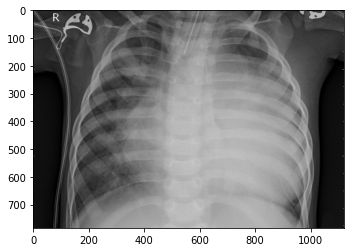

In [116]:
prediction('/content/drive/MyDrive/multilabel dataset/test/PNEUMONIA/PNEUMONIA(3421).jpg')

(1318, 1773, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 37ms/step
[[3.2737802e-11 9.9965262e-01 3.4738256e-04]]
1
NORMAL


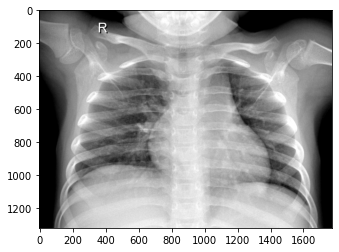

In [117]:
prediction('/content/drive/MyDrive/multilabel dataset/test/NORMAL/NORMAL(1267).jpg')